In [1]:
pip install pandas matplotlib seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [3]:
data = pd.read_csv("scraped data.csv")

In [4]:
data = data.dropna()
data = data[data['rating'].between(1, 5)]

In [5]:
data['sentiment'] = data['rating'].apply(lambda x: 'Positive' if x > 3 else 'Negative')

In [7]:
positive_reviews = data[data['sentiment'] == 'Positive']['review'].str.lower()
drivers = ['easy to use', 'fast', 'secure', 'convenient']
driver_counts = {driver: positive_reviews.str.contains(driver).sum() for driver in drivers}
top_drivers = sorted(driver_counts.items(), key=lambda x: x[1], reverse=True)[:2]

In [8]:
negative_reviews = data[data['sentiment'] == 'Negative']['review'].str.lower()
pain_points = ['crash', 'slow', 'screenshot', 'not working']
pain_point_counts = {point: negative_reviews.str.contains(point).sum() for point in pain_points}
top_pain_points = sorted(pain_point_counts.items(), key=lambda x: x[1], reverse=True)[:2]

In [9]:
bank_sentiment = data.groupby(['bank', 'sentiment']).size().unstack(fill_value=0)
bank_avg_rating = data.groupby('bank')['rating'].mean()

<Figure size 800x600 with 0 Axes>

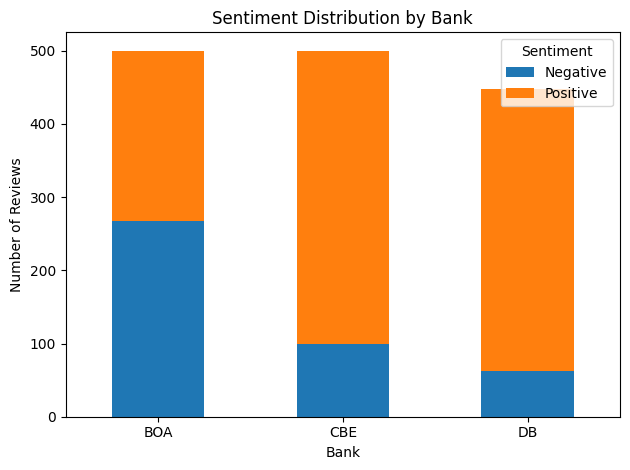

In [10]:
plt.figure(figsize=(8, 6))
bank_sentiment.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('sentiment_distribution.png')

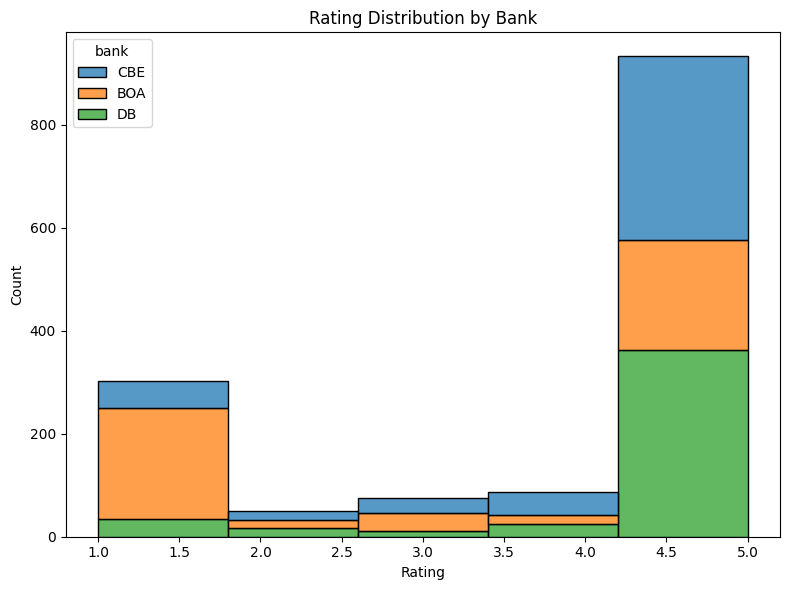

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='rating', hue='bank', multiple='stack', bins=5)
plt.title('Rating Distribution by Bank')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('rating_distribution.png')

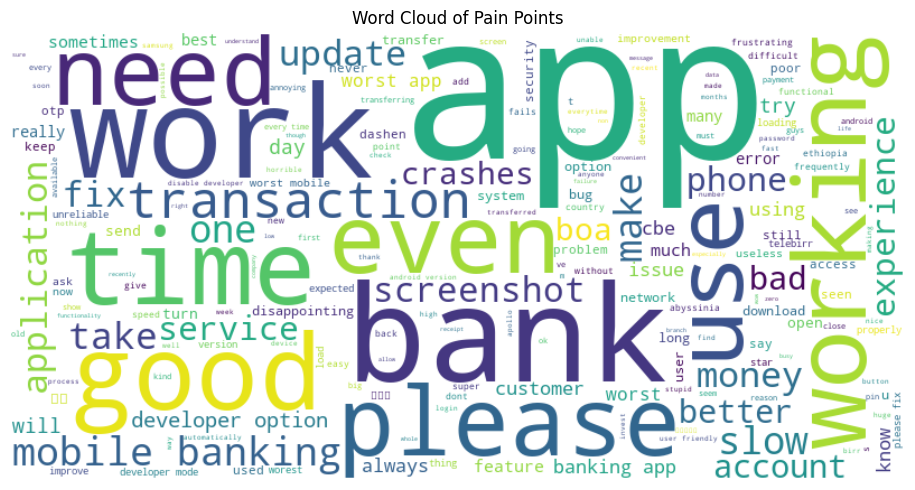

In [12]:
pain_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pain_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Pain Points')
plt.axis('off')
plt.tight_layout()
plt.savefig('wordcloud_pain_points.png')